In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import multi_gpu_model
from tensorflow.python.client import device_lib
from sklearn.model_selection import train_test_split
import gc

In [35]:
def plot_accuracy(model):
    accuracy = model.history['acc']
    val_accuracy = model.history['val_acc']
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

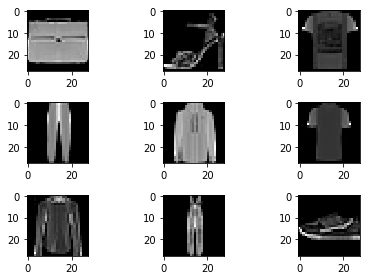

In [26]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1) # normalize the train data
x_test = tf.keras.utils.normalize(x_test, axis=1) # normalize the test data

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15)

# Look at the first 9 images from the dataset
images = range(0,9)
for i in images:
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    
#Show the plot
plt.tight_layout()

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [30]:
multi_model = multi_gpu_model(model, gpus=2)
multi_model.compile(tf.keras.optimizers.SGD(lr=0.5), loss = 'mean_squared_error', metrics=['accuracy'])
history1 = multi_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=256)

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
51000/51000 [==============================] - 2s 30us/step - loss: 0.0204 - acc: 0.8609 - val_loss: 0.0217 - val_acc: 0.8464
Epoch 2/20
51000/51000 [==============================] - 1s 20us/step - loss: 0.0202 - acc: 0.8625 - val_loss: 0.0223 - val_acc: 0.8421
Epoch 3/20
51000/51000 [==============================] - 1s 19us/step - loss: 0.0200 - acc: 0.8640 - val_loss: 0.0201 - val_acc: 0.8626
Epoch 4/20
51000/51000 [==============================] - 1s 18us/step - loss: 0.0198 - acc: 0.8649 - val_loss: 0.0203 - val_acc: 0.8607
Epoch 5/20
51000/51000 [==============================] - 1s 19us/step - loss: 0.0196 - acc: 0.8673 - val_loss: 0.0196 - val_acc: 0.8657
Epoch 6/20
51000/51000 [==============================] - 1s 18us/step - loss: 0.0194 - acc: 0.8687 - val_loss: 0.0204 - val_acc: 0.8587
Epoch 7/20
51000/51000 [==============================] - 1s 19us/step - loss: 0.0193 - acc: 0.8689 - val_loss: 0.0195 - val_acc:

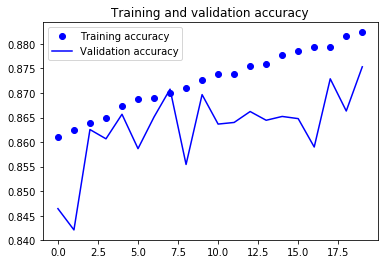

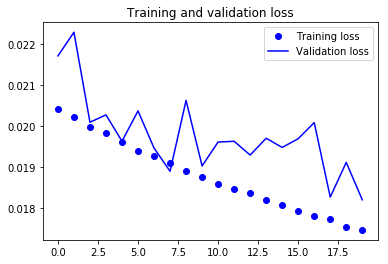

In [36]:
plot_accuracy(history1)

In [33]:
#Evaluate how the model does on the test set
score = history1.model.evaluate(x_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.020733028239011766
Test accuracy: 0.8556


In [41]:
multi_model = multi_gpu_model(model, gpus=2)
multi_model.compile(tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics=['accuracy'])
history2 = multi_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
51000/51000 [==============================] - 8s 163us/step - loss: 0.1977 - acc: 0.9238 - val_loss: 0.3304 - val_acc: 0.8821
Epoch 2/20
51000/51000 [==============================] - 7s 147us/step - loss: 0.1838 - acc: 0.9306 - val_loss: 0.3491 - val_acc: 0.8810
Epoch 3/20
51000/51000 [==============================] - 9s 172us/step - loss: 0.1780 - acc: 0.9313 - val_loss: 0.3280 - val_acc: 0.8852
Epoch 4/20
51000/51000 [==============================] - 9s 182us/step - loss: 0.1688 - acc: 0.9354 - val_loss: 0.3294 - val_acc: 0.8921
Epoch 5/20
51000/51000 [==============================] - 9s 172us/step - loss: 0.1603 - acc: 0.9394 - val_loss: 0.3634 - val_acc: 0.8826
Epoch 6/20
51000/51000 [==============================] - 8s 162us/step - loss: 0.1554 - acc: 0.9397 - val_loss: 0.3481 - val_acc: 0.8949
Epoch 7/20
51000/51000 [==============================] - 8s 156us/step - loss: 0.1514 - acc: 0.9424 - val_loss: 0.3254 - v

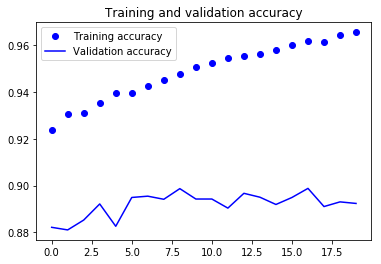

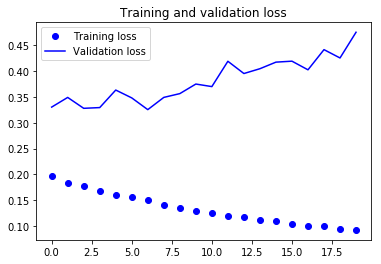

In [42]:
plot_accuracy(history2)

In [57]:
#Evaluate how the model does on the test set
score = history2.model.evaluate(x_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.5213941941052675
Test accuracy: 0.8797


We see overfitting. We add regularizer.


In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.0005),),
    tf.keras.layers.Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.0005)),
    tf.keras.layers.Dense(10, activation="softmax")])

In [50]:
multi_model = multi_gpu_model(model, gpus=2)
multi_model.compile(tf.keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics=['accuracy'])
history3 = multi_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=256)

Train on 51000 samples, validate on 9000 samples
Epoch 1/20
51000/51000 [==============================] - 2s 39us/step - loss: 1.8816 - acc: 0.5526 - val_loss: 1.3276 - val_acc: 0.7443
Epoch 2/20
51000/51000 [==============================] - 1s 28us/step - loss: 1.1167 - acc: 0.7512 - val_loss: 0.9725 - val_acc: 0.7579
Epoch 3/20
51000/51000 [==============================] - 1s 25us/step - loss: 0.9059 - acc: 0.7704 - val_loss: 0.8559 - val_acc: 0.7711
Epoch 4/20
51000/51000 [==============================] - 1s 27us/step - loss: 0.8099 - acc: 0.7799 - val_loss: 0.7881 - val_acc: 0.7703
Epoch 5/20
51000/51000 [==============================] - 1s 24us/step - loss: 0.7487 - acc: 0.7870 - val_loss: 0.7351 - val_acc: 0.7831
Epoch 6/20
51000/51000 [==============================] - 1s 24us/step - loss: 0.6912 - acc: 0.8183 - val_loss: 0.6852 - val_acc: 0.8449
Epoch 7/20
51000/51000 [==============================] - 1s 23us/step - loss: 0.6249 - acc: 0.8594 - val_loss: 0.6168 - val_acc:

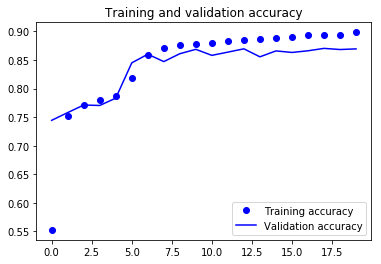

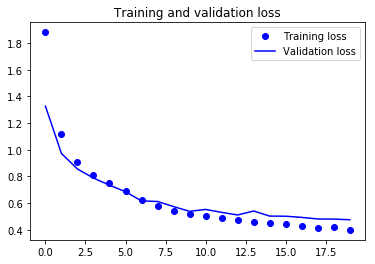

In [54]:
plot_accuracy(history3)

In [56]:
#Evaluate how the model does on the test set
score = history3.model.evaluate(x_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.44007364196777343
Test accuracy: 0.8586
